# GAN Training

## imports

In [2]:
import os
import matplotlib.pyplot as plt

from models.GAN_a import GAN
from utils.loaders import load_safari


In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
(x_train, y_train) = load_safari(DATA_NAME)

In [5]:
x_train.shape

(80000, 28, 28, 1)

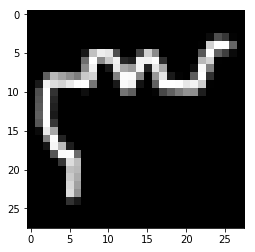

In [6]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## architecture

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [8]:
gan.discriminator.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)         

In [9]:
gan.generator.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
activation_4 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)      

## training

In [10]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [11]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

0 [D loss: (0.718)(R 0.697, F 0.740)] [D acc: (0.156)(0.312, 0.000)] [G loss: 0.681] [G acc: 1.000]
1 [D loss: (0.833)(R 0.652, F 1.015)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.673] [G acc: 1.000]
2 [D loss: (0.685)(R 0.667, F 0.702)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.654] [G acc: 1.000]
3 [D loss: (0.673)(R 0.647, F 0.698)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.589] [G acc: 1.000]
4 [D loss: (0.689)(R 0.572, F 0.806)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.565] [G acc: 1.000]
5 [D loss: (0.654)(R 0.506, F 0.802)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.515] [G acc: 1.000]
6 [D loss: (0.721)(R 0.392, F 1.050)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.623] [G acc: 1.000]
7 [D loss: (0.595)(R 0.418, F 0.772)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.634] [G acc: 1.000]
8 [D loss: (0.550)(R 0.248, F 0.853)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.693] [G acc: 0.531]
9 [D loss: (0.431)(R 0.148, F 0.714)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.711] [G acc: 0.062]


85 [D loss: (0.464)(R 0.452, F 0.476)] [D acc: (0.852)(0.812, 0.891)] [G loss: 1.734] [G acc: 0.000]
86 [D loss: (0.311)(R 0.197, F 0.425)] [D acc: (0.891)(0.922, 0.859)] [G loss: 1.985] [G acc: 0.000]
87 [D loss: (0.144)(R 0.054, F 0.233)] [D acc: (0.992)(1.000, 0.984)] [G loss: 2.414] [G acc: 0.000]
88 [D loss: (0.572)(R 0.314, F 0.830)] [D acc: (0.688)(0.891, 0.484)] [G loss: 2.134] [G acc: 0.000]
89 [D loss: (0.508)(R 0.536, F 0.480)] [D acc: (0.836)(0.750, 0.922)] [G loss: 1.552] [G acc: 0.000]
90 [D loss: (0.329)(R 0.161, F 0.498)] [D acc: (0.859)(0.953, 0.766)] [G loss: 1.541] [G acc: 0.031]
91 [D loss: (0.282)(R 0.153, F 0.412)] [D acc: (0.898)(0.938, 0.859)] [G loss: 1.961] [G acc: 0.000]
92 [D loss: (0.553)(R 0.525, F 0.582)] [D acc: (0.734)(0.797, 0.672)] [G loss: 1.499] [G acc: 0.016]
93 [D loss: (0.374)(R 0.171, F 0.576)] [D acc: (0.875)(0.922, 0.828)] [G loss: 2.139] [G acc: 0.000]
94 [D loss: (0.377)(R 0.514, F 0.240)] [D acc: (0.852)(0.766, 0.938)] [G loss: 2.272] [G ac

166 [D loss: (0.530)(R 0.631, F 0.429)] [D acc: (0.828)(0.703, 0.953)] [G loss: 1.063] [G acc: 0.094]
167 [D loss: (0.658)(R 0.506, F 0.810)] [D acc: (0.617)(0.781, 0.453)] [G loss: 1.190] [G acc: 0.047]
168 [D loss: (0.512)(R 0.578, F 0.446)] [D acc: (0.820)(0.734, 0.906)] [G loss: 1.608] [G acc: 0.000]
169 [D loss: (0.499)(R 0.528, F 0.469)] [D acc: (0.734)(0.688, 0.781)] [G loss: 2.540] [G acc: 0.000]
170 [D loss: (0.573)(R 0.884, F 0.263)] [D acc: (0.766)(0.578, 0.953)] [G loss: 1.777] [G acc: 0.016]
171 [D loss: (0.821)(R 0.406, F 1.237)] [D acc: (0.570)(0.875, 0.266)] [G loss: 1.506] [G acc: 0.000]
172 [D loss: (0.761)(R 0.748, F 0.775)] [D acc: (0.508)(0.578, 0.438)] [G loss: 0.972] [G acc: 0.141]
173 [D loss: (0.629)(R 0.555, F 0.702)] [D acc: (0.656)(0.766, 0.547)] [G loss: 0.981] [G acc: 0.094]
174 [D loss: (0.632)(R 0.613, F 0.651)] [D acc: (0.703)(0.703, 0.703)] [G loss: 0.942] [G acc: 0.125]
175 [D loss: (0.655)(R 0.572, F 0.737)] [D acc: (0.633)(0.719, 0.547)] [G loss: 1.

250 [D loss: (0.656)(R 0.585, F 0.728)] [D acc: (0.586)(0.656, 0.516)] [G loss: 0.872] [G acc: 0.156]
251 [D loss: (0.681)(R 0.705, F 0.657)] [D acc: (0.617)(0.516, 0.719)] [G loss: 0.837] [G acc: 0.141]
252 [D loss: (0.693)(R 0.592, F 0.793)] [D acc: (0.617)(0.703, 0.531)] [G loss: 0.866] [G acc: 0.094]
253 [D loss: (0.669)(R 0.673, F 0.666)] [D acc: (0.602)(0.531, 0.672)] [G loss: 0.882] [G acc: 0.078]
254 [D loss: (0.641)(R 0.633, F 0.648)] [D acc: (0.680)(0.625, 0.734)] [G loss: 0.865] [G acc: 0.062]
255 [D loss: (0.701)(R 0.617, F 0.786)] [D acc: (0.523)(0.625, 0.422)] [G loss: 0.862] [G acc: 0.156]
256 [D loss: (0.663)(R 0.687, F 0.639)] [D acc: (0.633)(0.516, 0.750)] [G loss: 0.855] [G acc: 0.141]
257 [D loss: (0.633)(R 0.601, F 0.666)] [D acc: (0.641)(0.672, 0.609)] [G loss: 0.975] [G acc: 0.062]
258 [D loss: (0.685)(R 0.629, F 0.740)] [D acc: (0.578)(0.594, 0.562)] [G loss: 0.900] [G acc: 0.078]
259 [D loss: (0.673)(R 0.693, F 0.653)] [D acc: (0.648)(0.562, 0.734)] [G loss: 0.

331 [D loss: (0.605)(R 0.631, F 0.579)] [D acc: (0.664)(0.562, 0.766)] [G loss: 1.171] [G acc: 0.109]
332 [D loss: (0.620)(R 0.546, F 0.694)] [D acc: (0.703)(0.719, 0.688)] [G loss: 1.140] [G acc: 0.156]
333 [D loss: (0.672)(R 0.636, F 0.707)] [D acc: (0.578)(0.594, 0.562)] [G loss: 1.034] [G acc: 0.109]
334 [D loss: (0.645)(R 0.663, F 0.627)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.046] [G acc: 0.094]
335 [D loss: (0.600)(R 0.563, F 0.637)] [D acc: (0.680)(0.688, 0.672)] [G loss: 1.140] [G acc: 0.094]
336 [D loss: (0.618)(R 0.534, F 0.701)] [D acc: (0.656)(0.734, 0.578)] [G loss: 1.082] [G acc: 0.109]
337 [D loss: (0.589)(R 0.593, F 0.586)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.003] [G acc: 0.156]
338 [D loss: (0.623)(R 0.549, F 0.697)] [D acc: (0.641)(0.703, 0.578)] [G loss: 1.077] [G acc: 0.109]
339 [D loss: (0.663)(R 0.641, F 0.685)] [D acc: (0.609)(0.547, 0.672)] [G loss: 1.063] [G acc: 0.062]
340 [D loss: (0.633)(R 0.616, F 0.650)] [D acc: (0.680)(0.688, 0.672)] [G loss: 1.

414 [D loss: (0.631)(R 0.603, F 0.659)] [D acc: (0.656)(0.672, 0.641)] [G loss: 1.115] [G acc: 0.109]
415 [D loss: (0.660)(R 0.677, F 0.644)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.009] [G acc: 0.156]
416 [D loss: (0.502)(R 0.474, F 0.529)] [D acc: (0.805)(0.797, 0.812)] [G loss: 1.203] [G acc: 0.062]
417 [D loss: (0.536)(R 0.466, F 0.607)] [D acc: (0.742)(0.781, 0.703)] [G loss: 1.225] [G acc: 0.094]
418 [D loss: (0.685)(R 0.671, F 0.699)] [D acc: (0.586)(0.594, 0.578)] [G loss: 1.141] [G acc: 0.109]
419 [D loss: (0.627)(R 0.565, F 0.689)] [D acc: (0.672)(0.688, 0.656)] [G loss: 1.146] [G acc: 0.094]
420 [D loss: (0.587)(R 0.619, F 0.556)] [D acc: (0.672)(0.547, 0.797)] [G loss: 1.053] [G acc: 0.156]
421 [D loss: (0.626)(R 0.627, F 0.625)] [D acc: (0.641)(0.578, 0.703)] [G loss: 1.130] [G acc: 0.047]
422 [D loss: (0.529)(R 0.531, F 0.527)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.241] [G acc: 0.062]
423 [D loss: (0.591)(R 0.519, F 0.664)] [D acc: (0.680)(0.719, 0.641)] [G loss: 1.

496 [D loss: (0.607)(R 0.536, F 0.677)] [D acc: (0.656)(0.609, 0.703)] [G loss: 1.202] [G acc: 0.109]
497 [D loss: (0.584)(R 0.584, F 0.583)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.298] [G acc: 0.078]
498 [D loss: (0.541)(R 0.492, F 0.590)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.250] [G acc: 0.109]
499 [D loss: (0.487)(R 0.450, F 0.525)] [D acc: (0.773)(0.812, 0.734)] [G loss: 1.985] [G acc: 0.016]
500 [D loss: (0.612)(R 0.770, F 0.454)] [D acc: (0.648)(0.469, 0.828)] [G loss: 1.394] [G acc: 0.031]
501 [D loss: (0.527)(R 0.465, F 0.588)] [D acc: (0.719)(0.766, 0.672)] [G loss: 1.254] [G acc: 0.094]
502 [D loss: (0.587)(R 0.564, F 0.610)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.233] [G acc: 0.156]
503 [D loss: (0.647)(R 0.586, F 0.709)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.211] [G acc: 0.156]
504 [D loss: (0.581)(R 0.467, F 0.695)] [D acc: (0.734)(0.812, 0.656)] [G loss: 1.159] [G acc: 0.047]
505 [D loss: (0.620)(R 0.591, F 0.649)] [D acc: (0.648)(0.609, 0.688)] [G loss: 1.

579 [D loss: (0.632)(R 0.544, F 0.720)] [D acc: (0.672)(0.703, 0.641)] [G loss: 1.234] [G acc: 0.109]
580 [D loss: (0.546)(R 0.532, F 0.561)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.156] [G acc: 0.047]
581 [D loss: (0.600)(R 0.665, F 0.536)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.117] [G acc: 0.172]
582 [D loss: (0.566)(R 0.597, F 0.536)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.176] [G acc: 0.109]
583 [D loss: (0.638)(R 0.599, F 0.677)] [D acc: (0.625)(0.641, 0.609)] [G loss: 1.163] [G acc: 0.047]
584 [D loss: (0.580)(R 0.608, F 0.552)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.093] [G acc: 0.125]
585 [D loss: (0.624)(R 0.603, F 0.645)] [D acc: (0.625)(0.594, 0.656)] [G loss: 1.216] [G acc: 0.188]
586 [D loss: (0.570)(R 0.587, F 0.552)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.189] [G acc: 0.125]
587 [D loss: (0.576)(R 0.543, F 0.608)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.078] [G acc: 0.203]
588 [D loss: (0.629)(R 0.557, F 0.701)] [D acc: (0.648)(0.688, 0.609)] [G loss: 1.

661 [D loss: (0.617)(R 0.696, F 0.538)] [D acc: (0.672)(0.531, 0.812)] [G loss: 1.142] [G acc: 0.094]
662 [D loss: (0.643)(R 0.701, F 0.584)] [D acc: (0.641)(0.547, 0.734)] [G loss: 0.988] [G acc: 0.172]
663 [D loss: (0.633)(R 0.639, F 0.628)] [D acc: (0.578)(0.562, 0.594)] [G loss: 0.988] [G acc: 0.188]
664 [D loss: (0.618)(R 0.522, F 0.715)] [D acc: (0.680)(0.719, 0.641)] [G loss: 1.186] [G acc: 0.078]
665 [D loss: (0.614)(R 0.699, F 0.530)] [D acc: (0.711)(0.547, 0.875)] [G loss: 1.041] [G acc: 0.156]
666 [D loss: (0.544)(R 0.546, F 0.541)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.074] [G acc: 0.141]
667 [D loss: (0.614)(R 0.549, F 0.679)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.007] [G acc: 0.219]
668 [D loss: (0.673)(R 0.598, F 0.747)] [D acc: (0.633)(0.609, 0.656)] [G loss: 1.022] [G acc: 0.141]
669 [D loss: (0.598)(R 0.565, F 0.631)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.049] [G acc: 0.062]
670 [D loss: (0.632)(R 0.603, F 0.662)] [D acc: (0.656)(0.625, 0.688)] [G loss: 1.

744 [D loss: (0.557)(R 0.579, F 0.535)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.101] [G acc: 0.156]
745 [D loss: (0.707)(R 0.587, F 0.827)] [D acc: (0.578)(0.594, 0.562)] [G loss: 1.266] [G acc: 0.141]
746 [D loss: (0.663)(R 0.785, F 0.540)] [D acc: (0.617)(0.422, 0.812)] [G loss: 1.080] [G acc: 0.094]
747 [D loss: (0.597)(R 0.622, F 0.573)] [D acc: (0.664)(0.562, 0.766)] [G loss: 1.046] [G acc: 0.125]
748 [D loss: (0.587)(R 0.516, F 0.658)] [D acc: (0.703)(0.750, 0.656)] [G loss: 1.151] [G acc: 0.062]
749 [D loss: (0.547)(R 0.531, F 0.563)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.068] [G acc: 0.156]
750 [D loss: (0.558)(R 0.543, F 0.574)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.289] [G acc: 0.109]
751 [D loss: (0.597)(R 0.595, F 0.598)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.204] [G acc: 0.203]
752 [D loss: (0.608)(R 0.568, F 0.649)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.134] [G acc: 0.109]
753 [D loss: (0.578)(R 0.576, F 0.580)] [D acc: (0.656)(0.625, 0.688)] [G loss: 1.

825 [D loss: (0.641)(R 0.521, F 0.760)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.337] [G acc: 0.125]
826 [D loss: (0.580)(R 0.572, F 0.588)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.288] [G acc: 0.109]
827 [D loss: (0.596)(R 0.715, F 0.476)] [D acc: (0.703)(0.562, 0.844)] [G loss: 1.061] [G acc: 0.094]
828 [D loss: (0.536)(R 0.441, F 0.631)] [D acc: (0.758)(0.812, 0.703)] [G loss: 1.104] [G acc: 0.188]
829 [D loss: (0.600)(R 0.566, F 0.634)] [D acc: (0.688)(0.703, 0.672)] [G loss: 1.199] [G acc: 0.141]
830 [D loss: (0.590)(R 0.687, F 0.492)] [D acc: (0.680)(0.531, 0.828)] [G loss: 1.180] [G acc: 0.062]
831 [D loss: (0.624)(R 0.525, F 0.723)] [D acc: (0.664)(0.734, 0.594)] [G loss: 1.216] [G acc: 0.141]
832 [D loss: (0.578)(R 0.562, F 0.593)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.375] [G acc: 0.125]
833 [D loss: (0.598)(R 0.579, F 0.616)] [D acc: (0.664)(0.672, 0.656)] [G loss: 1.349] [G acc: 0.109]
834 [D loss: (0.572)(R 0.571, F 0.574)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.

906 [D loss: (0.630)(R 0.638, F 0.623)] [D acc: (0.641)(0.656, 0.625)] [G loss: 1.240] [G acc: 0.125]
907 [D loss: (0.567)(R 0.642, F 0.493)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.260] [G acc: 0.062]
908 [D loss: (0.593)(R 0.654, F 0.533)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.209] [G acc: 0.094]
909 [D loss: (0.530)(R 0.545, F 0.515)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.269] [G acc: 0.078]
910 [D loss: (0.606)(R 0.571, F 0.641)] [D acc: (0.648)(0.625, 0.672)] [G loss: 1.122] [G acc: 0.156]
911 [D loss: (0.562)(R 0.551, F 0.573)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.169] [G acc: 0.188]
912 [D loss: (0.580)(R 0.643, F 0.517)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.137] [G acc: 0.109]
913 [D loss: (0.596)(R 0.621, F 0.570)] [D acc: (0.656)(0.625, 0.688)] [G loss: 1.216] [G acc: 0.141]
914 [D loss: (0.535)(R 0.534, F 0.537)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.293] [G acc: 0.094]
915 [D loss: (0.544)(R 0.420, F 0.668)] [D acc: (0.734)(0.812, 0.656)] [G loss: 1.

990 [D loss: (0.668)(R 0.538, F 0.799)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.199] [G acc: 0.062]
991 [D loss: (0.582)(R 0.544, F 0.620)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.193] [G acc: 0.078]
992 [D loss: (0.583)(R 0.603, F 0.563)] [D acc: (0.656)(0.641, 0.672)] [G loss: 1.226] [G acc: 0.109]
993 [D loss: (0.468)(R 0.438, F 0.498)] [D acc: (0.828)(0.797, 0.859)] [G loss: 1.454] [G acc: 0.094]
994 [D loss: (0.519)(R 0.546, F 0.493)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.298] [G acc: 0.109]
995 [D loss: (0.616)(R 0.595, F 0.637)] [D acc: (0.688)(0.656, 0.719)] [G loss: 1.329] [G acc: 0.125]
996 [D loss: (0.590)(R 0.490, F 0.691)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.289] [G acc: 0.141]
997 [D loss: (0.650)(R 0.664, F 0.636)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.280] [G acc: 0.078]
998 [D loss: (0.650)(R 0.710, F 0.591)] [D acc: (0.633)(0.547, 0.719)] [G loss: 1.252] [G acc: 0.094]
999 [D loss: (0.637)(R 0.716, F 0.558)] [D acc: (0.609)(0.500, 0.719)] [G loss: 1.

1069 [D loss: (0.626)(R 0.675, F 0.578)] [D acc: (0.617)(0.578, 0.656)] [G loss: 1.215] [G acc: 0.109]
1070 [D loss: (0.534)(R 0.551, F 0.517)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.128] [G acc: 0.188]
1071 [D loss: (0.518)(R 0.558, F 0.478)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.271] [G acc: 0.172]
1072 [D loss: (0.508)(R 0.468, F 0.547)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.276] [G acc: 0.141]
1073 [D loss: (0.583)(R 0.579, F 0.586)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.435] [G acc: 0.078]
1074 [D loss: (0.565)(R 0.535, F 0.595)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.350] [G acc: 0.062]
1075 [D loss: (0.621)(R 0.622, F 0.620)] [D acc: (0.672)(0.562, 0.781)] [G loss: 1.316] [G acc: 0.078]
1076 [D loss: (0.555)(R 0.607, F 0.504)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.288] [G acc: 0.047]
1077 [D loss: (0.534)(R 0.533, F 0.536)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.285] [G acc: 0.094]
1078 [D loss: (0.539)(R 0.554, F 0.523)] [D acc: (0.703)(0.594, 0.812)] [

1150 [D loss: (0.570)(R 0.522, F 0.619)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.477] [G acc: 0.094]
1151 [D loss: (0.620)(R 0.629, F 0.612)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.307] [G acc: 0.031]
1152 [D loss: (0.553)(R 0.588, F 0.518)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.348] [G acc: 0.062]
1153 [D loss: (0.580)(R 0.620, F 0.540)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.243] [G acc: 0.172]
1154 [D loss: (0.497)(R 0.408, F 0.586)] [D acc: (0.828)(0.844, 0.812)] [G loss: 1.450] [G acc: 0.047]
1155 [D loss: (0.578)(R 0.535, F 0.621)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.373] [G acc: 0.078]
1156 [D loss: (0.494)(R 0.468, F 0.519)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.427] [G acc: 0.125]
1157 [D loss: (0.544)(R 0.471, F 0.616)] [D acc: (0.734)(0.766, 0.703)] [G loss: 1.488] [G acc: 0.078]
1158 [D loss: (0.527)(R 0.532, F 0.523)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.452] [G acc: 0.094]
1159 [D loss: (0.498)(R 0.476, F 0.519)] [D acc: (0.758)(0.734, 0.781)] [

1231 [D loss: (0.600)(R 0.631, F 0.570)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.246] [G acc: 0.125]
1232 [D loss: (0.526)(R 0.409, F 0.644)] [D acc: (0.766)(0.797, 0.734)] [G loss: 1.379] [G acc: 0.109]
1233 [D loss: (0.567)(R 0.596, F 0.537)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.342] [G acc: 0.078]
1234 [D loss: (0.537)(R 0.680, F 0.393)] [D acc: (0.703)(0.547, 0.859)] [G loss: 1.457] [G acc: 0.047]
1235 [D loss: (0.572)(R 0.636, F 0.508)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.151] [G acc: 0.125]
1236 [D loss: (0.527)(R 0.433, F 0.622)] [D acc: (0.734)(0.766, 0.703)] [G loss: 1.309] [G acc: 0.172]
1237 [D loss: (0.519)(R 0.452, F 0.586)] [D acc: (0.742)(0.766, 0.719)] [G loss: 1.362] [G acc: 0.047]
1238 [D loss: (0.595)(R 0.622, F 0.568)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.315] [G acc: 0.094]
1239 [D loss: (0.495)(R 0.527, F 0.463)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.270] [G acc: 0.141]
1240 [D loss: (0.494)(R 0.486, F 0.503)] [D acc: (0.766)(0.734, 0.797)] [

1311 [D loss: (0.598)(R 0.636, F 0.559)] [D acc: (0.648)(0.594, 0.703)] [G loss: 1.268] [G acc: 0.094]
1312 [D loss: (0.577)(R 0.602, F 0.553)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.323] [G acc: 0.125]
1313 [D loss: (0.569)(R 0.621, F 0.517)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.192] [G acc: 0.141]
1314 [D loss: (0.517)(R 0.419, F 0.615)] [D acc: (0.742)(0.781, 0.703)] [G loss: 1.238] [G acc: 0.141]
1315 [D loss: (0.587)(R 0.525, F 0.650)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.355] [G acc: 0.125]
1316 [D loss: (0.585)(R 0.552, F 0.619)] [D acc: (0.695)(0.672, 0.719)] [G loss: 1.431] [G acc: 0.094]
1317 [D loss: (0.608)(R 0.639, F 0.577)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.442] [G acc: 0.047]
1318 [D loss: (0.547)(R 0.676, F 0.418)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.318] [G acc: 0.141]
1319 [D loss: (0.533)(R 0.592, F 0.473)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.250] [G acc: 0.141]
1320 [D loss: (0.579)(R 0.515, F 0.644)] [D acc: (0.727)(0.719, 0.734)] [

1391 [D loss: (0.439)(R 0.479, F 0.400)] [D acc: (0.805)(0.703, 0.906)] [G loss: 1.420] [G acc: 0.062]
1392 [D loss: (0.719)(R 0.574, F 0.865)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.259] [G acc: 0.094]
1393 [D loss: (0.553)(R 0.648, F 0.458)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.346] [G acc: 0.062]
1394 [D loss: (0.457)(R 0.507, F 0.408)] [D acc: (0.805)(0.734, 0.875)] [G loss: 1.472] [G acc: 0.031]
1395 [D loss: (0.593)(R 0.634, F 0.552)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.292] [G acc: 0.094]
1396 [D loss: (0.528)(R 0.568, F 0.489)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.491] [G acc: 0.047]
1397 [D loss: (0.508)(R 0.504, F 0.511)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.261] [G acc: 0.078]
1398 [D loss: (0.547)(R 0.574, F 0.520)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.204] [G acc: 0.125]
1399 [D loss: (0.503)(R 0.429, F 0.577)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.410] [G acc: 0.125]
1400 [D loss: (0.571)(R 0.475, F 0.668)] [D acc: (0.719)(0.734, 0.703)] [

1471 [D loss: (0.472)(R 0.473, F 0.471)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.345] [G acc: 0.109]
1472 [D loss: (0.562)(R 0.531, F 0.594)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.403] [G acc: 0.094]
1473 [D loss: (0.536)(R 0.473, F 0.599)] [D acc: (0.773)(0.781, 0.766)] [G loss: 1.287] [G acc: 0.078]
1474 [D loss: (0.545)(R 0.570, F 0.520)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.351] [G acc: 0.062]
1475 [D loss: (0.558)(R 0.649, F 0.466)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.396] [G acc: 0.062]
1476 [D loss: (0.515)(R 0.560, F 0.470)] [D acc: (0.773)(0.641, 0.906)] [G loss: 1.103] [G acc: 0.297]
1477 [D loss: (0.566)(R 0.613, F 0.518)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.291] [G acc: 0.125]
1478 [D loss: (0.585)(R 0.524, F 0.646)] [D acc: (0.703)(0.750, 0.656)] [G loss: 1.414] [G acc: 0.016]
1479 [D loss: (0.479)(R 0.520, F 0.439)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.234] [G acc: 0.156]
1480 [D loss: (0.465)(R 0.462, F 0.468)] [D acc: (0.805)(0.719, 0.891)] [

1551 [D loss: (0.545)(R 0.580, F 0.510)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.320] [G acc: 0.062]
1552 [D loss: (0.576)(R 0.501, F 0.650)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.471] [G acc: 0.031]
1553 [D loss: (0.525)(R 0.591, F 0.460)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.353] [G acc: 0.078]
1554 [D loss: (0.518)(R 0.487, F 0.548)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.363] [G acc: 0.062]
1555 [D loss: (0.535)(R 0.546, F 0.524)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.454] [G acc: 0.062]
1556 [D loss: (0.532)(R 0.480, F 0.585)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.537] [G acc: 0.109]
1557 [D loss: (0.506)(R 0.545, F 0.467)] [D acc: (0.781)(0.656, 0.906)] [G loss: 1.535] [G acc: 0.109]
1558 [D loss: (0.533)(R 0.545, F 0.522)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.516] [G acc: 0.109]
1559 [D loss: (0.499)(R 0.484, F 0.514)] [D acc: (0.773)(0.766, 0.781)] [G loss: 1.431] [G acc: 0.156]
1560 [D loss: (0.557)(R 0.490, F 0.625)] [D acc: (0.750)(0.703, 0.797)] [

1631 [D loss: (0.564)(R 0.598, F 0.530)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.578] [G acc: 0.078]
1632 [D loss: (0.612)(R 0.745, F 0.479)] [D acc: (0.656)(0.500, 0.812)] [G loss: 1.214] [G acc: 0.188]
1633 [D loss: (0.452)(R 0.490, F 0.413)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.487] [G acc: 0.094]
1634 [D loss: (0.575)(R 0.543, F 0.608)] [D acc: (0.711)(0.750, 0.672)] [G loss: 1.458] [G acc: 0.156]
1635 [D loss: (0.536)(R 0.501, F 0.570)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.478] [G acc: 0.094]
1636 [D loss: (0.582)(R 0.642, F 0.521)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.245] [G acc: 0.125]
1637 [D loss: (0.525)(R 0.510, F 0.540)] [D acc: (0.781)(0.703, 0.859)] [G loss: 1.445] [G acc: 0.094]
1638 [D loss: (0.523)(R 0.522, F 0.524)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.399] [G acc: 0.109]
1639 [D loss: (0.576)(R 0.538, F 0.614)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.333] [G acc: 0.109]
1640 [D loss: (0.596)(R 0.578, F 0.614)] [D acc: (0.625)(0.578, 0.672)] [

1711 [D loss: (0.641)(R 0.666, F 0.616)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.357] [G acc: 0.094]
1712 [D loss: (0.492)(R 0.450, F 0.534)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.378] [G acc: 0.125]
1713 [D loss: (0.505)(R 0.608, F 0.402)] [D acc: (0.781)(0.641, 0.922)] [G loss: 1.339] [G acc: 0.188]
1714 [D loss: (0.574)(R 0.494, F 0.653)] [D acc: (0.688)(0.703, 0.672)] [G loss: 1.360] [G acc: 0.109]
1715 [D loss: (0.458)(R 0.465, F 0.451)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.743] [G acc: 0.109]
1716 [D loss: (0.595)(R 0.500, F 0.690)] [D acc: (0.734)(0.734, 0.734)] [G loss: 1.438] [G acc: 0.078]
1717 [D loss: (0.584)(R 0.639, F 0.528)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.196] [G acc: 0.141]
1718 [D loss: (0.563)(R 0.610, F 0.517)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.229] [G acc: 0.172]
1719 [D loss: (0.498)(R 0.474, F 0.523)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.223] [G acc: 0.172]
1720 [D loss: (0.586)(R 0.569, F 0.604)] [D acc: (0.672)(0.625, 0.719)] [

1791 [D loss: (0.631)(R 0.547, F 0.716)] [D acc: (0.680)(0.703, 0.656)] [G loss: 1.222] [G acc: 0.109]
1792 [D loss: (0.564)(R 0.573, F 0.556)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.362] [G acc: 0.062]
1793 [D loss: (0.602)(R 0.569, F 0.635)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.252] [G acc: 0.141]
1794 [D loss: (0.554)(R 0.577, F 0.531)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.270] [G acc: 0.094]
1795 [D loss: (0.515)(R 0.595, F 0.435)] [D acc: (0.758)(0.625, 0.891)] [G loss: 1.213] [G acc: 0.109]
1796 [D loss: (0.555)(R 0.598, F 0.512)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.223] [G acc: 0.203]
1797 [D loss: (0.484)(R 0.446, F 0.522)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.378] [G acc: 0.094]
1798 [D loss: (0.508)(R 0.458, F 0.559)] [D acc: (0.773)(0.797, 0.750)] [G loss: 1.428] [G acc: 0.125]
1799 [D loss: (0.545)(R 0.612, F 0.479)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.439] [G acc: 0.078]
1800 [D loss: (0.518)(R 0.517, F 0.519)] [D acc: (0.695)(0.672, 0.719)] [

1871 [D loss: (0.578)(R 0.624, F 0.531)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.328] [G acc: 0.172]
1872 [D loss: (0.546)(R 0.591, F 0.501)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.312] [G acc: 0.109]
1873 [D loss: (0.560)(R 0.545, F 0.575)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.329] [G acc: 0.141]
1874 [D loss: (0.629)(R 0.534, F 0.723)] [D acc: (0.695)(0.703, 0.688)] [G loss: 1.245] [G acc: 0.078]
1875 [D loss: (0.539)(R 0.589, F 0.489)] [D acc: (0.734)(0.594, 0.875)] [G loss: 1.225] [G acc: 0.141]
1876 [D loss: (0.512)(R 0.584, F 0.439)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.380] [G acc: 0.109]
1877 [D loss: (0.607)(R 0.513, F 0.700)] [D acc: (0.641)(0.641, 0.641)] [G loss: 1.336] [G acc: 0.078]
1878 [D loss: (0.598)(R 0.658, F 0.538)] [D acc: (0.711)(0.594, 0.828)] [G loss: 1.289] [G acc: 0.094]
1879 [D loss: (0.574)(R 0.568, F 0.580)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.237] [G acc: 0.172]
1880 [D loss: (0.531)(R 0.558, F 0.503)] [D acc: (0.719)(0.672, 0.766)] [

1951 [D loss: (0.546)(R 0.578, F 0.513)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.576] [G acc: 0.047]
1952 [D loss: (0.547)(R 0.622, F 0.472)] [D acc: (0.711)(0.594, 0.828)] [G loss: 1.466] [G acc: 0.047]
1953 [D loss: (0.597)(R 0.585, F 0.609)] [D acc: (0.695)(0.672, 0.719)] [G loss: 1.336] [G acc: 0.141]
1954 [D loss: (0.528)(R 0.496, F 0.561)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.373] [G acc: 0.062]
1955 [D loss: (0.551)(R 0.596, F 0.506)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.356] [G acc: 0.125]
1956 [D loss: (0.538)(R 0.574, F 0.502)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.355] [G acc: 0.156]
1957 [D loss: (0.526)(R 0.464, F 0.589)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.347] [G acc: 0.078]
1958 [D loss: (0.470)(R 0.520, F 0.421)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.484] [G acc: 0.156]
1959 [D loss: (0.648)(R 0.581, F 0.715)] [D acc: (0.641)(0.656, 0.625)] [G loss: 1.307] [G acc: 0.094]
1960 [D loss: (0.507)(R 0.564, F 0.449)] [D acc: (0.781)(0.703, 0.859)] [

2031 [D loss: (0.548)(R 0.542, F 0.553)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.315] [G acc: 0.109]
2032 [D loss: (0.430)(R 0.436, F 0.425)] [D acc: (0.805)(0.703, 0.906)] [G loss: 1.512] [G acc: 0.109]
2033 [D loss: (0.492)(R 0.518, F 0.466)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.749] [G acc: 0.078]
2034 [D loss: (0.521)(R 0.468, F 0.575)] [D acc: (0.742)(0.750, 0.734)] [G loss: 1.785] [G acc: 0.078]
2035 [D loss: (0.551)(R 0.611, F 0.491)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.701] [G acc: 0.031]
2036 [D loss: (0.639)(R 0.612, F 0.665)] [D acc: (0.641)(0.547, 0.734)] [G loss: 1.360] [G acc: 0.062]
2037 [D loss: (0.538)(R 0.580, F 0.496)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.503] [G acc: 0.078]
2038 [D loss: (0.633)(R 0.704, F 0.562)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.450] [G acc: 0.094]
2039 [D loss: (0.560)(R 0.519, F 0.601)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.253] [G acc: 0.125]
2040 [D loss: (0.473)(R 0.512, F 0.433)] [D acc: (0.766)(0.656, 0.875)] [

2111 [D loss: (0.579)(R 0.569, F 0.589)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.616] [G acc: 0.047]
2112 [D loss: (0.611)(R 0.628, F 0.594)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.479] [G acc: 0.156]
2113 [D loss: (0.506)(R 0.576, F 0.436)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.444] [G acc: 0.125]
2114 [D loss: (0.553)(R 0.602, F 0.504)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.477] [G acc: 0.062]
2115 [D loss: (0.540)(R 0.450, F 0.630)] [D acc: (0.727)(0.766, 0.688)] [G loss: 1.333] [G acc: 0.078]
2116 [D loss: (0.541)(R 0.611, F 0.471)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.278] [G acc: 0.188]
2117 [D loss: (0.436)(R 0.387, F 0.485)] [D acc: (0.758)(0.781, 0.734)] [G loss: 1.564] [G acc: 0.094]
2118 [D loss: (0.510)(R 0.520, F 0.499)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.465] [G acc: 0.031]
2119 [D loss: (0.604)(R 0.623, F 0.586)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.590] [G acc: 0.141]
2120 [D loss: (0.527)(R 0.547, F 0.507)] [D acc: (0.711)(0.609, 0.812)] [

2191 [D loss: (0.485)(R 0.471, F 0.499)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.366] [G acc: 0.078]
2192 [D loss: (0.506)(R 0.473, F 0.538)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.419] [G acc: 0.062]
2193 [D loss: (0.564)(R 0.487, F 0.641)] [D acc: (0.734)(0.781, 0.688)] [G loss: 1.561] [G acc: 0.062]
2194 [D loss: (0.595)(R 0.609, F 0.581)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.326] [G acc: 0.078]
2195 [D loss: (0.603)(R 0.711, F 0.495)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.317] [G acc: 0.078]
2196 [D loss: (0.501)(R 0.509, F 0.492)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.431] [G acc: 0.094]
2197 [D loss: (0.566)(R 0.509, F 0.624)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.413] [G acc: 0.109]
2198 [D loss: (0.590)(R 0.648, F 0.532)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.317] [G acc: 0.141]
2199 [D loss: (0.542)(R 0.651, F 0.433)] [D acc: (0.727)(0.562, 0.891)] [G loss: 1.253] [G acc: 0.172]
2200 [D loss: (0.442)(R 0.437, F 0.447)] [D acc: (0.789)(0.734, 0.844)] [

2271 [D loss: (0.518)(R 0.545, F 0.490)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.315] [G acc: 0.047]
2272 [D loss: (0.555)(R 0.610, F 0.501)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.380] [G acc: 0.141]
2273 [D loss: (0.549)(R 0.560, F 0.539)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.268] [G acc: 0.188]
2274 [D loss: (0.529)(R 0.516, F 0.542)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.255] [G acc: 0.156]
2275 [D loss: (0.534)(R 0.569, F 0.499)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.421] [G acc: 0.031]
2276 [D loss: (0.511)(R 0.439, F 0.583)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.564] [G acc: 0.062]
2277 [D loss: (0.483)(R 0.477, F 0.489)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.397] [G acc: 0.125]
2278 [D loss: (0.623)(R 0.583, F 0.664)] [D acc: (0.625)(0.594, 0.656)] [G loss: 1.352] [G acc: 0.156]
2279 [D loss: (0.515)(R 0.504, F 0.526)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.447] [G acc: 0.047]
2280 [D loss: (0.519)(R 0.572, F 0.466)] [D acc: (0.727)(0.609, 0.844)] [

2351 [D loss: (0.527)(R 0.536, F 0.518)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.640] [G acc: 0.016]
2352 [D loss: (0.526)(R 0.561, F 0.491)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.339] [G acc: 0.125]
2353 [D loss: (0.578)(R 0.625, F 0.530)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.299] [G acc: 0.172]
2354 [D loss: (0.427)(R 0.396, F 0.458)] [D acc: (0.797)(0.734, 0.859)] [G loss: 1.455] [G acc: 0.141]
2355 [D loss: (0.415)(R 0.406, F 0.423)] [D acc: (0.805)(0.750, 0.859)] [G loss: 1.696] [G acc: 0.125]
2356 [D loss: (0.657)(R 0.603, F 0.711)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.525] [G acc: 0.156]
2357 [D loss: (0.577)(R 0.644, F 0.510)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.432] [G acc: 0.156]
2358 [D loss: (0.513)(R 0.560, F 0.467)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.473] [G acc: 0.109]
2359 [D loss: (0.499)(R 0.529, F 0.468)] [D acc: (0.742)(0.609, 0.875)] [G loss: 1.451] [G acc: 0.109]
2360 [D loss: (0.591)(R 0.605, F 0.577)] [D acc: (0.688)(0.641, 0.734)] [

2431 [D loss: (0.613)(R 0.664, F 0.562)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.197] [G acc: 0.156]
2432 [D loss: (0.474)(R 0.447, F 0.501)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.316] [G acc: 0.094]
2433 [D loss: (0.548)(R 0.642, F 0.455)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.190] [G acc: 0.188]
2434 [D loss: (0.434)(R 0.372, F 0.496)] [D acc: (0.812)(0.797, 0.828)] [G loss: 1.335] [G acc: 0.125]
2435 [D loss: (0.551)(R 0.473, F 0.629)] [D acc: (0.719)(0.719, 0.719)] [G loss: 1.593] [G acc: 0.109]
2436 [D loss: (0.543)(R 0.494, F 0.593)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.494] [G acc: 0.094]
2437 [D loss: (0.508)(R 0.518, F 0.497)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.555] [G acc: 0.062]
2438 [D loss: (0.503)(R 0.546, F 0.459)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.581] [G acc: 0.141]
2439 [D loss: (0.561)(R 0.530, F 0.592)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.376] [G acc: 0.109]
2440 [D loss: (0.547)(R 0.623, F 0.470)] [D acc: (0.758)(0.656, 0.859)] [

2511 [D loss: (0.520)(R 0.519, F 0.522)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.442] [G acc: 0.109]
2512 [D loss: (0.563)(R 0.574, F 0.551)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.340] [G acc: 0.062]
2513 [D loss: (0.525)(R 0.525, F 0.526)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.382] [G acc: 0.094]
2514 [D loss: (0.532)(R 0.488, F 0.575)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.402] [G acc: 0.094]
2515 [D loss: (0.555)(R 0.512, F 0.597)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.328] [G acc: 0.125]
2516 [D loss: (0.493)(R 0.552, F 0.434)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.416] [G acc: 0.109]
2517 [D loss: (0.495)(R 0.443, F 0.547)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.517] [G acc: 0.078]
2518 [D loss: (0.525)(R 0.553, F 0.498)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.584] [G acc: 0.078]
2519 [D loss: (0.545)(R 0.582, F 0.508)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.428] [G acc: 0.094]
2520 [D loss: (0.543)(R 0.595, F 0.490)] [D acc: (0.711)(0.578, 0.844)] [

2591 [D loss: (0.558)(R 0.623, F 0.493)] [D acc: (0.711)(0.594, 0.828)] [G loss: 1.375] [G acc: 0.078]
2592 [D loss: (0.545)(R 0.620, F 0.471)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.387] [G acc: 0.109]
2593 [D loss: (0.571)(R 0.605, F 0.537)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.400] [G acc: 0.078]
2594 [D loss: (0.544)(R 0.590, F 0.497)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.325] [G acc: 0.062]
2595 [D loss: (0.470)(R 0.493, F 0.447)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.372] [G acc: 0.078]
2596 [D loss: (0.588)(R 0.517, F 0.659)] [D acc: (0.656)(0.609, 0.703)] [G loss: 1.333] [G acc: 0.078]
2597 [D loss: (0.527)(R 0.612, F 0.443)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.360] [G acc: 0.078]
2598 [D loss: (0.479)(R 0.501, F 0.457)] [D acc: (0.797)(0.734, 0.859)] [G loss: 1.382] [G acc: 0.094]
2599 [D loss: (0.438)(R 0.421, F 0.454)] [D acc: (0.805)(0.766, 0.844)] [G loss: 1.527] [G acc: 0.062]
2600 [D loss: (0.512)(R 0.458, F 0.566)] [D acc: (0.750)(0.734, 0.766)] [

2671 [D loss: (0.505)(R 0.465, F 0.545)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.517] [G acc: 0.094]
2672 [D loss: (0.438)(R 0.451, F 0.425)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.792] [G acc: 0.094]
2673 [D loss: (0.438)(R 0.435, F 0.440)] [D acc: (0.828)(0.781, 0.875)] [G loss: 1.639] [G acc: 0.078]
2674 [D loss: (0.582)(R 0.620, F 0.544)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.504] [G acc: 0.078]
2675 [D loss: (0.599)(R 0.641, F 0.558)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.338] [G acc: 0.156]
2676 [D loss: (0.540)(R 0.558, F 0.522)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.611] [G acc: 0.062]
2677 [D loss: (0.515)(R 0.482, F 0.549)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.513] [G acc: 0.094]
2678 [D loss: (0.439)(R 0.324, F 0.553)] [D acc: (0.781)(0.828, 0.734)] [G loss: 1.324] [G acc: 0.125]
2679 [D loss: (0.593)(R 0.510, F 0.676)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.347] [G acc: 0.156]
2680 [D loss: (0.549)(R 0.567, F 0.530)] [D acc: (0.695)(0.641, 0.750)] [

2751 [D loss: (0.614)(R 0.646, F 0.583)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.383] [G acc: 0.156]
2752 [D loss: (0.568)(R 0.600, F 0.536)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.470] [G acc: 0.016]
2753 [D loss: (0.529)(R 0.496, F 0.562)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.523] [G acc: 0.047]
2754 [D loss: (0.543)(R 0.576, F 0.511)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.368] [G acc: 0.125]
2755 [D loss: (0.514)(R 0.527, F 0.500)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.427] [G acc: 0.109]
2756 [D loss: (0.506)(R 0.504, F 0.507)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.360] [G acc: 0.078]
2757 [D loss: (0.581)(R 0.551, F 0.610)] [D acc: (0.695)(0.672, 0.719)] [G loss: 1.336] [G acc: 0.109]
2758 [D loss: (0.468)(R 0.534, F 0.402)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.383] [G acc: 0.125]
2759 [D loss: (0.512)(R 0.418, F 0.605)] [D acc: (0.750)(0.781, 0.719)] [G loss: 1.469] [G acc: 0.078]
2760 [D loss: (0.437)(R 0.485, F 0.388)] [D acc: (0.789)(0.672, 0.906)] [

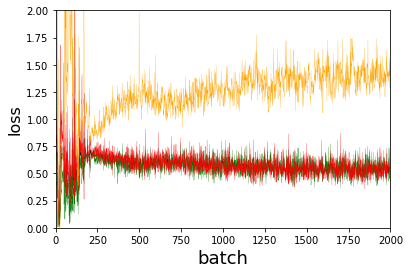

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


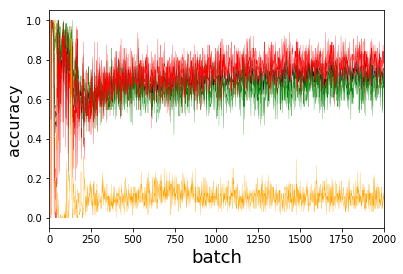

In [13]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()